# Introduction to Computational Medicine I:  Imaging
### ADNI and Limbic System


## Content:
- Data Preprocessing
- Data Visualization
    - Pie Charts
    - Scatter Plots
    - Bar Plots
- Z-score and Barcode
     - Z-Score Calculation
     - Barcode Plot
- Data Analysis
     - Relationship between the Volume and ADNI disease.(p-score)
     - Relationship between the Volume and AGE.(p-score and linear regression)
     - Relationship between the Volume of each side of our brain
 - Automatic Classification
    - Statistics
        - z-score Barcodes
        - H1: Control vs. Alzheimer's? (t-test)
        - H2: Volume vs. Age? (linear regression)

- MRICloud Data
    - Comparison with ADNI dataset
        - z-score Barcodes
        - Bar Plot

### part 1: Data Preprocessing

In [1]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Load the ADNI Data
data_org=pd.read_excel('ADNI_ICM_random200.xlsx')
data_org=data_org.replace({'\'':''},regex=True) #delete the ' ' of values
data_org = data_org.rename(columns=lambda x:x.strip('\'')) #delete the '' of the keys
#print(data)
# Select columns as need
rolls=['Amyg_R','Fimbria_R','Hippo_R','Mammillary_R','Amyg_L','Fimbria_L','Hippo_L','Mammillary_L']
p_info=['Subject_ID', 'Gender', 'Age', 'Diagnosis']
cols=np.concatenate((p_info,rolls),axis=0)
#print(cols)
dat_need=data_org[cols]
#print(dat_need)

In [3]:
# divided by ADNI and Control
ADNI = dat_need[dat_need.Diagnosis =='AD/MCI']
ADNI = ADNI.reset_index(drop=True) #set index to zero
control = dat_need[dat_need.Diagnosis == 'NORMAL']
control = control.reset_index(drop=True) #set index to zero
#print(ADNI)
# divided by gender
female_ADNI = ADNI[ADNI.Gender == 'F']
male_ADNI = ADNI[ADNI.Gender == 'M']
male_control = control[control.Gender == 'M']
female_control = control[control.Gender == 'F']
# show the number 
print('The number of women diagnosed with ADNI is '+str(female_ADNI.shape[0]))
print('The number of men diagnosed with ADNI is '+str(male_ADNI.shape[0]))
print('The number of women not diagnosed with ADNI is '+str(female_control.shape[0]))
print('The number of men  not diagnosed with ADNI is '+str(female_control.shape[0]))


The number of women diagnosed with ADNI is 55
The number of men diagnosed with ADNI is 81
The number of women not diagnosed with ADNI is 32
The number of men  not diagnosed with ADNI is 32


In [4]:
# divided into different age group
dat_age50=dat_need[(dat_need.Age>=50)&(dat_need.Age<60)]
dat_age60=dat_need[(dat_need.Age>=60)&(dat_need.Age<70)]
dat_age70=dat_need[(dat_need.Age>=70)&(dat_need.Age<80)]
dat_age80=dat_need[(dat_need.Age>=80)&(dat_need.Age<90)]
dat_age90=dat_need[(dat_need.Age>=90)]

# ADNI Group
ADNI_age50=ADNI[(ADNI.Age>=50)&(ADNI.Age<60)]
ADNI_age60=ADNI[(ADNI.Age>=60)&(ADNI.Age<70)]
ADNI_age70=ADNI[(ADNI.Age>=70)&(ADNI.Age<80)]
ADNI_age80=ADNI[(ADNI.Age>=80)&(ADNI.Age<90)]
ADNI_age90=ADNI[(ADNI.Age>=90)]

# Control Group
control_age50=control[(control.Age>=50)&(control.Age<60)]
control_age60=control[(control.Age>=60)&(control.Age<70)]
control_age70=control[(control.Age>=70)&(control.Age<80)]
control_age80=control[(control.Age>=80)&(control.Age<90)]
control_age90=control[(control.Age>=90)]
#show the result
print('There are '+ str(dat_age50.shape[0])+' patients between the ages of 50-60 ')
print('There are '+ str(dat_age60.shape[0])+' patients between the ages of 60-70 ')
print('There are '+ str(dat_age70.shape[0])+' patients between the ages of 70-80 ')
print('There are '+ str(dat_age80.shape[0])+' patients between the ages of 80-90 ')
print('There are '+ str(dat_age90.shape[0])+' patients older than 90 ')

print('There are '+ str(ADNI_age50.shape[0])+' ADNI patients between the ages of 50-60 ')
print('There are '+ str(ADNI_age60.shape[0])+' ADNI patients between the ages of 60-70 ')
print('There are '+ str(ADNI_age70.shape[0])+' ADNI patients between the ages of 70-80 ')
print('There are '+ str(ADNI_age80.shape[0])+' ADNI patients between the ages of 80-90 ')
print('There are '+ str(ADNI_age90.shape[0])+' ADNI patients older than 90 ')

print('There are '+ str(control_age50.shape[0])+' Control Group patients between the ages of 50-60 ')
print('There are '+ str(control_age60.shape[0])+' Control Group patients between the ages of 60-70 ')
print('There are '+ str(control_age70.shape[0])+' Control Group patients between the ages of 70-80 ')
print('There are '+ str(control_age80.shape[0])+' Control Group patients between the ages of 80-90 ')
print('There are '+ str(control_age90.shape[0])+' Control Group patients older than 90 ')


There are 1 patients between the ages of 50-60 
There are 23 patients between the ages of 60-70 
There are 102 patients between the ages of 70-80 
There are 73 patients between the ages of 80-90 
There are 1 patients older than 90 
There are 1 ADNI patients between the ages of 50-60 
There are 21 ADNI patients between the ages of 60-70 
There are 57 ADNI patients between the ages of 70-80 
There are 56 ADNI patients between the ages of 80-90 
There are 1 ADNI patients older than 90 
There are 0 Control Group patients between the ages of 50-60 
There are 2 Control Group patients between the ages of 60-70 
There are 45 Control Group patients between the ages of 70-80 
There are 17 Control Group patients between the ages of 80-90 
There are 0 Control Group patients older than 90 


### Part 2: Visualization
 - Pie Charts
 - Scatter Plot
 - Bar Plot

#### Pie Charts

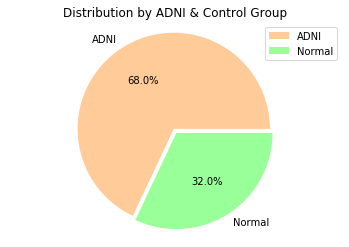

In [5]:
# Distribution for AD & control group
labels = "ADNI", "Normal"
sizes = [136, 64]

explode = (0, 0.05)

plt.pie(sizes, explode = explode, labels = labels, colors = ['#ffcc99','#99ff99'], autopct ='%1.1f%%')
plt.title('Distribution by ADNI & Control Group')

plt.axis('equal')
plt.legend()
plt.show()

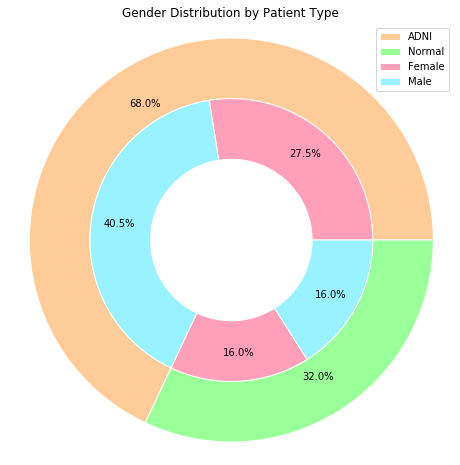

In [6]:
# Distribution for AD & control group by gender
vals = np.array([[55.,81.],[32.,32.]])

plt.figure(figsize=(8,8),dpi=72)
plt.pie(vals.sum(axis=1),radius=1,wedgeprops=dict(width=0.3,edgecolor='w'),
colors= ['#ffcc99','#99ff99'],autopct='%.1f%%',pctdistance=0.8)

labels = "ADNI", "Normal","Female", "Male"
plt.pie(vals.flatten(),radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),
colors= ['#ff9fba','#99f2ff'],autopct='%.1f%%',pctdistance=0.8)


plt.axis('equal')
plt.legend(labels=labels)
plt.title('Gender Distribution by Patient Type')
plt.show()

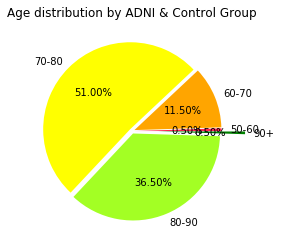

In [7]:
# Distribution for Age
labels = "50-60", "60-70","70-80","80-90","90+"
sizes = [1, 23,102,73,1]

explode = (0.03,0.03,0.03,0.03,0.3)

plt.pie(sizes, explode = explode, labels = labels,colors = ['#ff2451','orange','yellow','#a3ff24','green'], autopct ='%1.2f%%')
plt.title('Age distribution by ADNI & Control Group')

#plt.axis('equal')
#plt.legend()
plt.show()

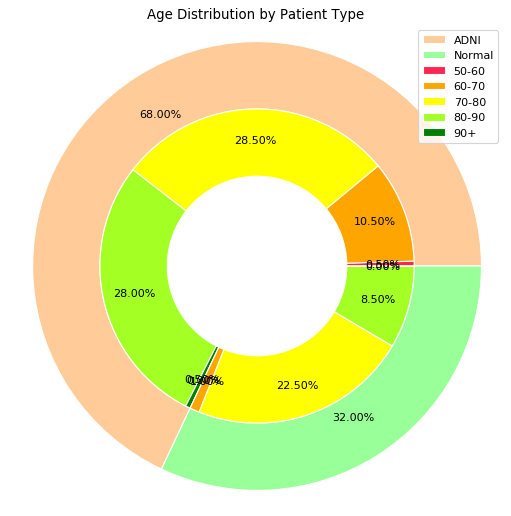

In [8]:
# Distribution for AD & control group by age
vals = np.array([[1,21,57,56,1],[0,2,45,17,0]])

plt.figure(figsize=(8,8),dpi=80)
plt.pie(vals.sum(axis=1),radius=1,wedgeprops=dict(width=0.3,edgecolor='w'),
colors= ['#ffcc99','#99ff99'],autopct='%.2f%%',pctdistance=0.8)

labels = "ADNI", "Normal","50-60", "60-70","70-80","80-90","90+"
plt.pie(vals.flatten(),radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),
colors = ['#ff2451','orange','yellow','#a3ff24','green'],autopct='%.2f%%',pctdistance=0.8)


plt.axis('equal')
plt.legend(labels=labels)
plt.title('Age Distribution by Patient Type')
plt.show()

#### Scatter Plot

D:\Users\fyh980928\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Users\fyh980928\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\Users\fyh980928\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Users\fyh9809

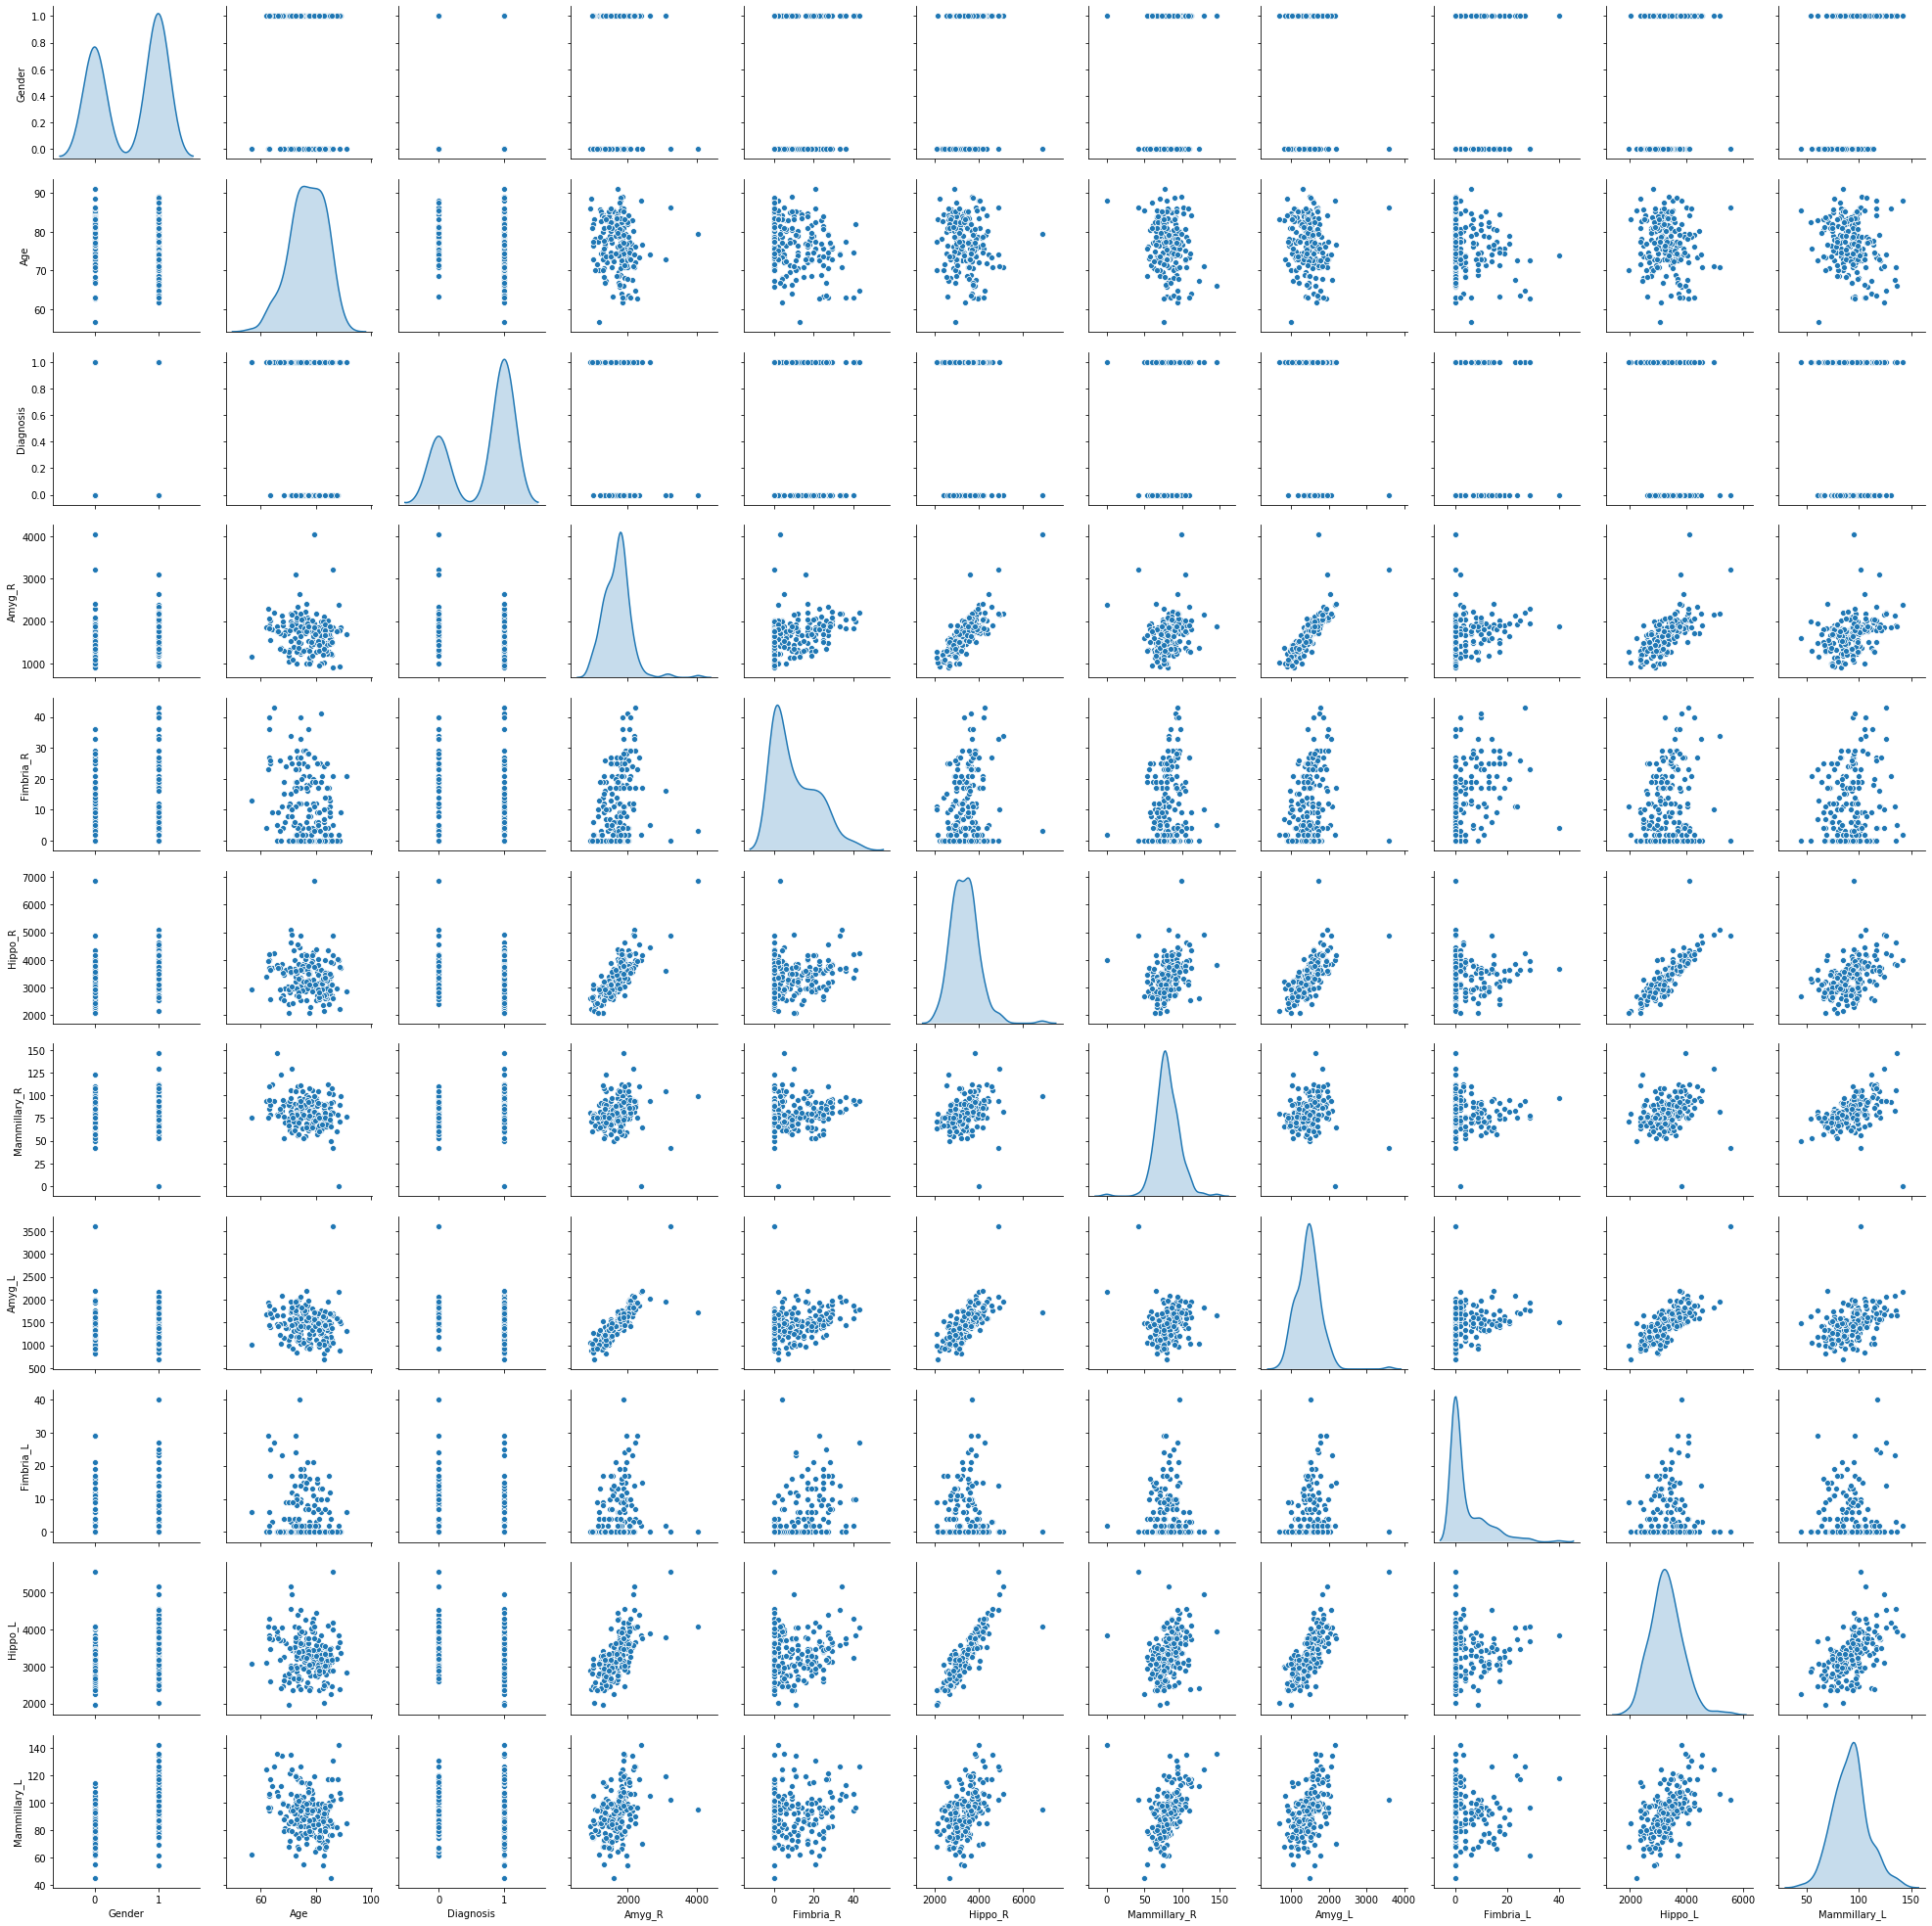

In [9]:
data_scatter=dat_need.copy()
#quantization
for i in range(0,200):
    if data_scatter.Gender[i]=='M':
        data_scatter.Gender[i]=1
    elif data_scatter.Gender[i]=='F':
        data_scatter.Gender[i]=0
   
for i in range(0,200):
    if data_scatter.Diagnosis[i]=='AD/MCI':
        data_scatter.Diagnosis[i]=1
    elif data_scatter.Diagnosis[i]=='NORMAL':
        data_scatter.Diagnosis[i]=0


pdata=data_scatter.dropna().drop(columns=['Subject_ID'])
sns.pairplot(pdata,diag_kind='kde')
plt.show()

#### Bar  Plot

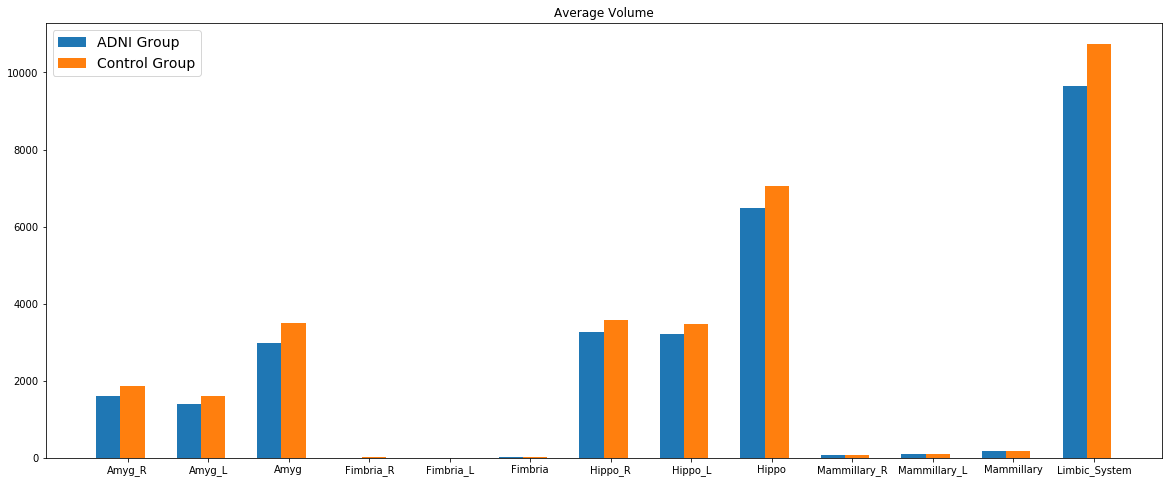

In [10]:
# Show the comparision between volume of ADNI and control group
sets=['Amyg_R','Amyg_L','Amyg','Fimbria_R','Fimbria_L','Fimbria',
'Hippo_R','Hippo_L','Hippo','Mammillary_R','Mammillary_L','Mammillary','Limbic_System']
ADNI_v=ADNI.copy()
control_v=control.copy()
del ADNI_v['Subject_ID']
del ADNI_v['Age']
del ADNI_v['Diagnosis']
del ADNI_v['Gender']
del control_v['Subject_ID']
del control_v['Age']
del control_v['Diagnosis']
del control_v['Gender']
#Average Volume
#Sum up the whole limbic system
Whole_value1=np.zeros(len(ADNI))
Whole_value2=np.zeros(len(control))
for i in range(0,8):
    Whole_value1=Whole_value1+ADNI[rolls[i]]
for i in range(0,8):
    Whole_value2=Whole_value2+control[rolls[i]]
control_v['Amyg']=control.Amyg_R+control.Amyg_L
control_v['Fimbria']=control.Fimbria_R+control.Fimbria_L
control_v['Mammillary']=control.Mammillary_R+control.Mammillary_L
control_v['Hippo']=control.Hippo_R+control.Hippo_L
control_v['Limbic_System']=Whole_value2
ADNI_v['Amyg']=ADNI.Amyg_R+ADNI.Amyg_L
ADNI_v['Fimbria']=ADNI.Fimbria_R+ADNI.Fimbria_L
ADNI_v['Mammillary']=ADNI.Mammillary_R+ADNI.Mammillary_L
ADNI_v['Hippo']=ADNI.Hippo_R+ADNI.Hippo_L
ADNI_v['Limbic_System']=Whole_value1

ADNI_avg={}
control_avg={}
for i in range(13):
    ADNI_avg[sets[i]]=np.mean(ADNI_v[sets[i]])
    control_avg[sets[i]]=np.mean(control_v[sets[i]])    


bar_width1=0.3
index_1=np.arange(len(sets))   
index_2=index_1+bar_width1 
#Plot
plt.figure(figsize=(20,8))
plt.title('Average Volume')
for i in range(13):
    plt.bar(index_1[i],height=ADNI_avg[sets[i]],color='#1f77b4',width=bar_width1)
    plt.bar(index_2[i],height=control_avg[sets[i]],color='#ff7f0e',width=bar_width1)
plt.xticks(index_1+0.8*bar_width1,sets)
plt.legend(['ADNI Group','Control Group'], loc='upper left', fontsize=14) 
plt.show()

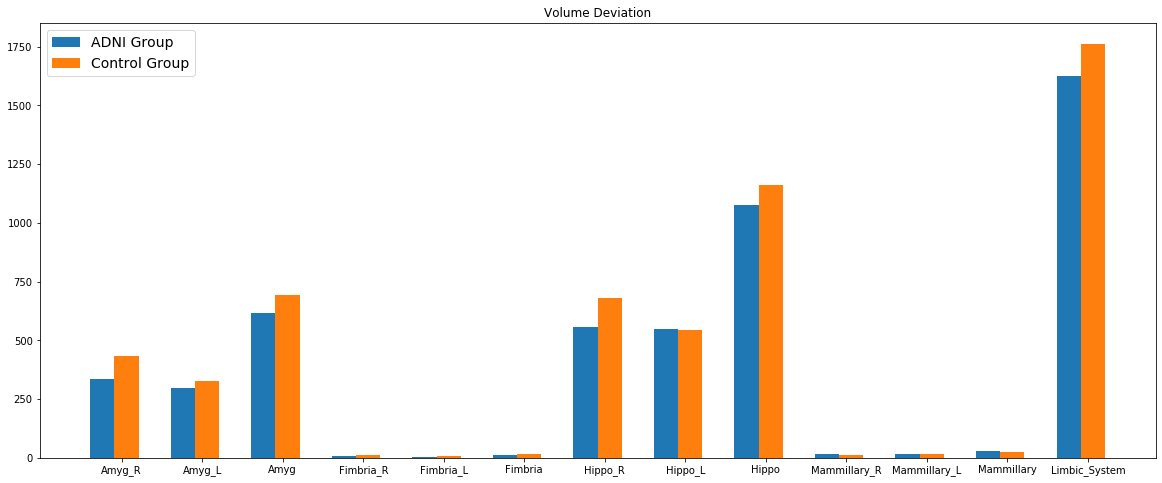

In [38]:
ADNI_dev={}
control_dev={}
for i in range(13):
    ADNI_dev[sets[i]]=np.std(ADNI_v[sets[i]])
    control_dev[sets[i]]=np.std(control_v[sets[i]])    


bar_width1=0.3
index_1=np.arange(len(sets))   
index_2=index_1+bar_width1 
#Plot
plt.figure(figsize=(20,8))
plt.title('Volume Deviation')
for i in range(13):
    plt.bar(index_1[i],height=ADNI_dev[sets[i]],color='#1f77b4',width=bar_width1)
    plt.bar(index_2[i],height=control_dev[sets[i]],color='#ff7f0e',width=bar_width1)
plt.xticks(index_1+0.8*bar_width1,sets)
plt.legend(['ADNI Group','Control Group'], loc='upper left', fontsize=14) 
plt.show()

#### Part 3:  Z-Score and Barcode 
 - Z-Score Calculation
 - Barcode Plot

In [11]:
# Z-score Function
def z_score(data,control):
    length = len(data)
    data_new=np.zeros(length)
    ave = np.mean(control)#compute mean
    #print(ave)
    dev=np.std(control)#compute deviation
    #print(dev)
    for i in range(length):
        data_new[i] = float((data[i] - ave)/dev)
        #print(data[i])
        #print(data[i]-ave)
        #print((data[i]-ave)/dev)
    return data_new

#Z-score has been calculated by this function in the program called "z_score.ipynb", and saved as excel

In [12]:
# Load Z-score for ID
z_score_ID=pd.read_excel('Z_score_ALL.xlsx')
z_score_ID.Age=z_score_ID.Age.round(0)
z_score_ID = z_score_ID.replace({'Subject_':''}, regex=True).set_index('Subject_ID') 
ad_zscore_ID=z_score_ID[z_score_ID.Diagnosis == 'AD/MCI']
control_zscore_ID=z_score_ID[z_score_ID.Diagnosis == 'NORMAL']
del z_score_ID['Age']
del z_score_ID['Gender']
del z_score_ID['Diagnosis']
del ad_zscore_ID['Age']
del ad_zscore_ID['Gender']
del ad_zscore_ID['Diagnosis']
del control_zscore_ID['Age']
del control_zscore_ID['Gender']
del control_zscore_ID['Diagnosis']
#print(ad_zscore_ID)

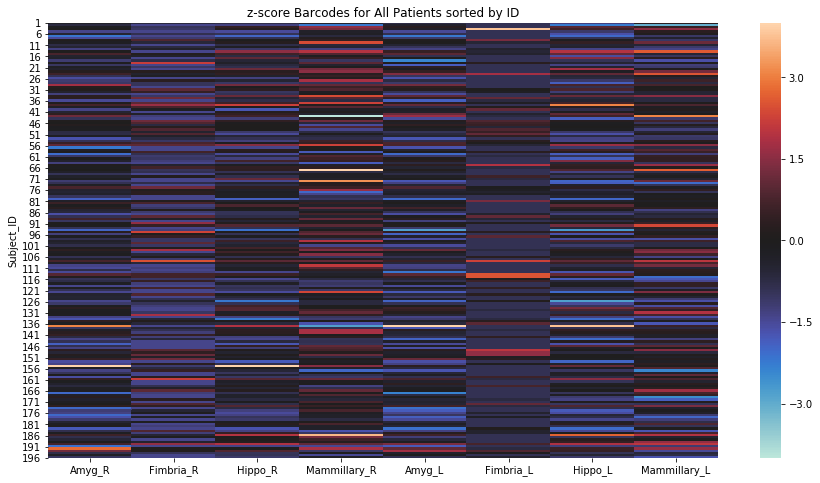

In [13]:
# heat map for all patients
#print(z_score_ID)
plt.figure(figsize=(15,8))
ax1 = sns.heatmap(z_score_ID, vmin=-4, vmax=4, center=0)
ax1.set(title = "z-score Barcodes for All Patients sorted by ID");

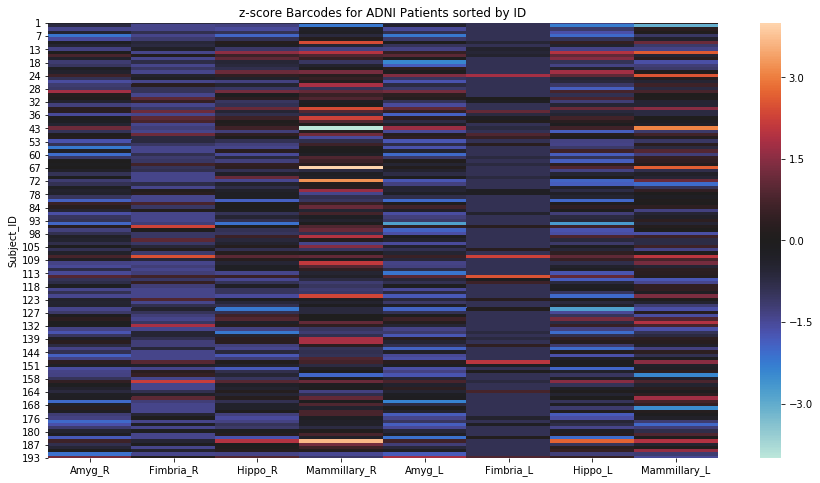

In [14]:
#Z-score for ADNI patients sorted by ID
plt.figure(figsize=(15,8))
ax1 = sns.heatmap(ad_zscore_ID, vmin=-4, vmax=4, center=0)
ax1.set(title = "z-score Barcodes for ADNI Patients sorted by ID");

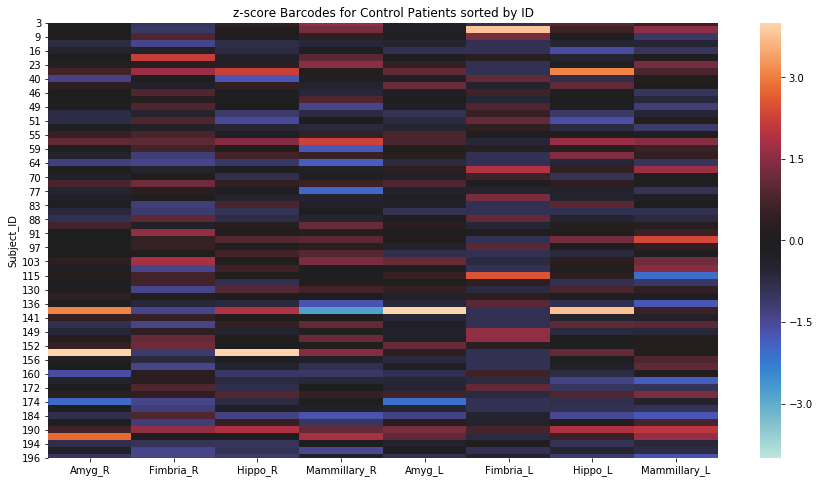

In [15]:
#Z-score for control patients sorted by ID
plt.figure(figsize=(15,8))
ax1 = sns.heatmap(control_zscore_ID, vmin=-4, vmax=4, center=0)
ax1.set(title = "z-score Barcodes for Control Patients sorted by ID");

In [16]:
# Load Z-score for Age
z_score_AGE=pd.read_excel('Z_score_ALL.xlsx')
z_score_AGE.Age=z_score_AGE.Age.round(0)
#print(z_score_AGE)
ad_zscore_AGE=z_score_AGE[z_score_AGE.Diagnosis == 'AD/MCI']
control_zscore_AGE=z_score_AGE[z_score_AGE.Diagnosis == 'NORMAL']
#print(z_score_AGE)
del z_score_AGE['Subject_ID']
del z_score_AGE['Gender']
del z_score_AGE['Diagnosis']
del ad_zscore_AGE['Subject_ID']
del ad_zscore_AGE['Gender']
del ad_zscore_AGE['Diagnosis']
del control_zscore_AGE['Subject_ID']
del control_zscore_AGE['Gender']
del control_zscore_AGE['Diagnosis']
z_score_AGE = z_score_AGE.sort_values(by=['Age']).set_index('Age').dropna() # set index to Age
ad_zscore_AGE = ad_zscore_AGE.sort_values(by=['Age']).set_index('Age').dropna() # set index to Age
control_zscore_AGE = control_zscore_AGE.sort_values(by=['Age']).set_index('Age').dropna() # set index to Age
#print(ad_zscore_AGE)

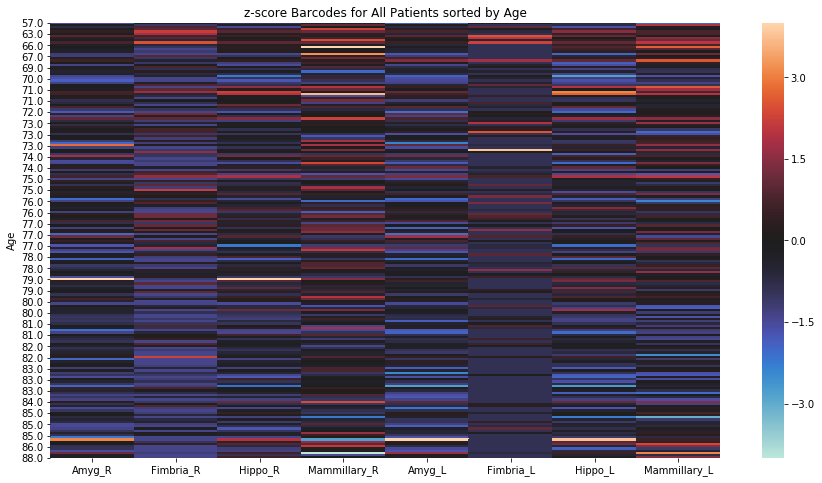

In [17]:
# heat map for all patients sorted by age
#print(z_score_ID)
plt.figure(figsize=(15,8))
ax1 = sns.heatmap(z_score_AGE, vmin=-4, vmax=4, center=0)
ax1.set(title = "z-score Barcodes for All Patients sorted by Age");

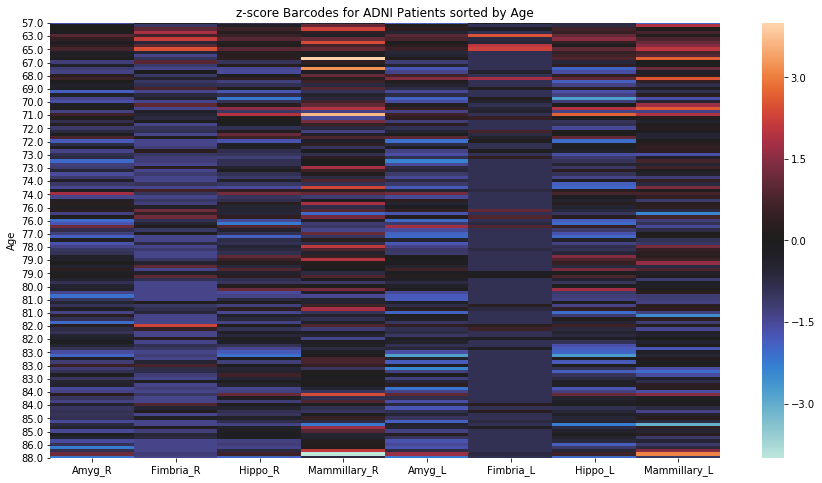

In [36]:
# heat map for ANDI patients sorted by age
plt.figure(figsize=(15,8))
#print(z_score_ID)
ax1 = sns.heatmap(ad_zscore_AGE, vmin=-4, vmax=4, center=0)
ax1.set(title = "z-score Barcodes for ADNI Patients sorted by Age");

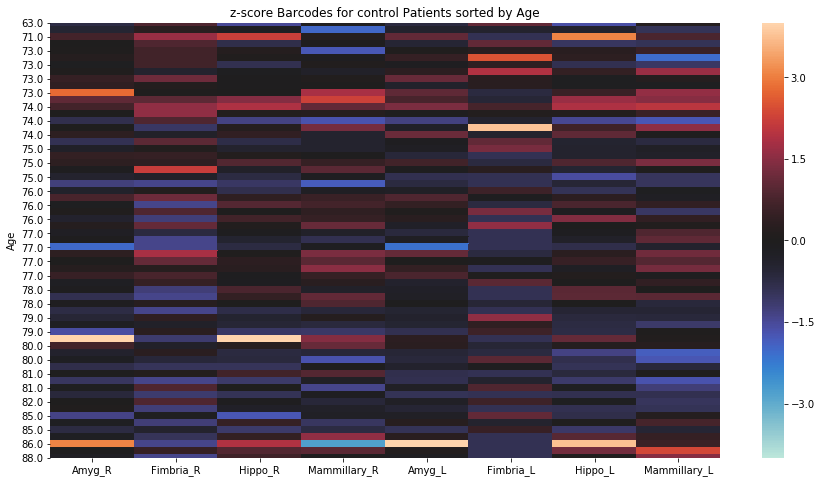

In [19]:
# heat map for control patients sorted by age
plt.figure(figsize=(15,8))
#print(z_score_ID)
ax1 = sns.heatmap(control_zscore_AGE, vmin=-4, vmax=4, center=0)
ax1.set(title = "z-score Barcodes for control Patients sorted by Age");

#### Part 4: Data Analysis
 - Relationship between the Volume and ADNI disease.(p-score)
 - Relationship between the Volume and AGE.(p-score and linear regression)
 - Relationship between the Volume of each side of our brain
 - Automatic Classification

### Difference of volume between ADNI Group and Control Group 

In [20]:
#Set new dictionary for volume
data_volume=dat_need.copy()
# Sum the value of each side
Amyg=np.zeros(200)
Fimbria=np.zeros(200)
Mammlillary=np.zeros(200)
Hippo=np.zeros(200)

data_volume['Amyg']=data_volume.Amyg_R+data_volume.Amyg_L
data_volume['Fimbria']=data_volume.Fimbria_R+data_volume.Fimbria_L
data_volume['Mammillary']=data_volume.Mammillary_R+data_volume.Mammillary_L
data_volume['Hippo']=data_volume.Hippo_R+data_volume.Hippo_L

#Sum up the whole limbic system
Whole_value=np.zeros(200)
for i in range(0,8):
    Whole_value=Whole_value+data_volume[rolls[i]]

data_volume['Limbic_System']=Whole_value

In [21]:
#quantization the diease
for i in range(0,200):
    if data_volume.Diagnosis[i]=='AD/MCI':
        data_volume.Diagnosis[i]=1
    elif data_volume.Diagnosis[i]=='NORMAL':
        data_volume.Diagnosis[i]=0

D:\Users\fyh980928\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Users\fyh980928\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
# find p-score

p_value_disease=[]
for region in sets:
    #print(disease)
    (r1, p1)= scipy.stats.pearsonr(data_volume['Diagnosis'], data_volume[region])
    #print(r)
    p_value_disease.append(p1)   

                   p_values
Amyg_R         1.897439e-06
Amyg_L         3.775390e-06
Amyg           8.054100e-07
Fimbria_R      5.542213e-06
Fimbria_L      1.794919e-06
Fimbria        7.878850e-08
Hippo_R        1.108254e-03
Hippo_L        1.029749e-03
Hippo          6.824055e-04
Mammillary_R   4.592170e-01
Mammillary_L   5.308413e-01
Mammillary     9.623898e-01
Limbic_System  2.785305e-05


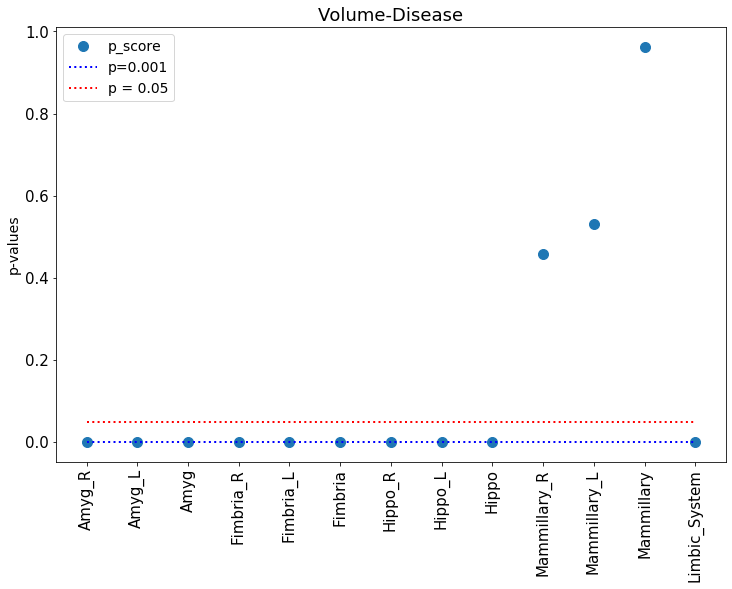

In [35]:
#plot P-values
p_values_disease = pd.DataFrame({'p_values': p_value_disease}, index=sets)   
plt.figure(figsize=(12,8))
plt.plot(p_values_disease['p_values'],'.',markersize = 20)
plt.xticks(rotation='vertical',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('p-values', fontsize=14)
plt.plot(np.arange(p_values_disease.shape[0]), np.full(p_values_disease.shape[0],0.001), 'b:', linewidth=2)
plt.plot(np.arange(p_values_disease.shape[0]), np.full(p_values_disease.shape[0],0.05), 'r:', linewidth=2)
plt.legend(['p_score','p=0.001','p = 0.05'], loc='upper left', fontsize=14) 
plt.title('Volume-Disease',fontsize = 18);
print(p_values_disease)

In [24]:
# P-test
for i in range(len(p_values_disease)):
    if p_values_disease.p_values[i] <= 0.001:
        print('The volume of the '+sets[i]+' has significant difference between ADNI Group and Control Group in the dataset.')
    elif p_values_disease.p_values[i] <= 0.05:
        print('The volume of the '+sets[i]+' has difference between ADNI Group and Control Group in the dataset.')
    else:
        print('There is no significant difference between the average volume of the '+sets[i]+' in the ADNI Group and Control Group in the dataset.')

The volume of the Amyg_R has significant difference between ADNI Group and Control Group in the dataset.
The volume of the Amyg_L has significant difference between ADNI Group and Control Group in the dataset.
The volume of the Amyg has significant difference between ADNI Group and Control Group in the dataset.
The volume of the Fimbria_R has significant difference between ADNI Group and Control Group in the dataset.
The volume of the Fimbria_L has significant difference between ADNI Group and Control Group in the dataset.
The volume of the Fimbria has significant difference between ADNI Group and Control Group in the dataset.
The volume of the Hippo_R has difference between ADNI Group and Control Group in the dataset.
The volume of the Hippo_L has difference between ADNI Group and Control Group in the dataset.
The volume of the Hippo has significant difference between ADNI Group and Control Group in the dataset.
There is no significant difference between the average volume of the Mamm

#### Conclusion 1 : The volume of most Limbic system has significant difference between ADNI Group and Control Group in the dataset. We assume that the volume of Limbic system is an important factor of ADNI.

### Difference of volume among people in different ages 

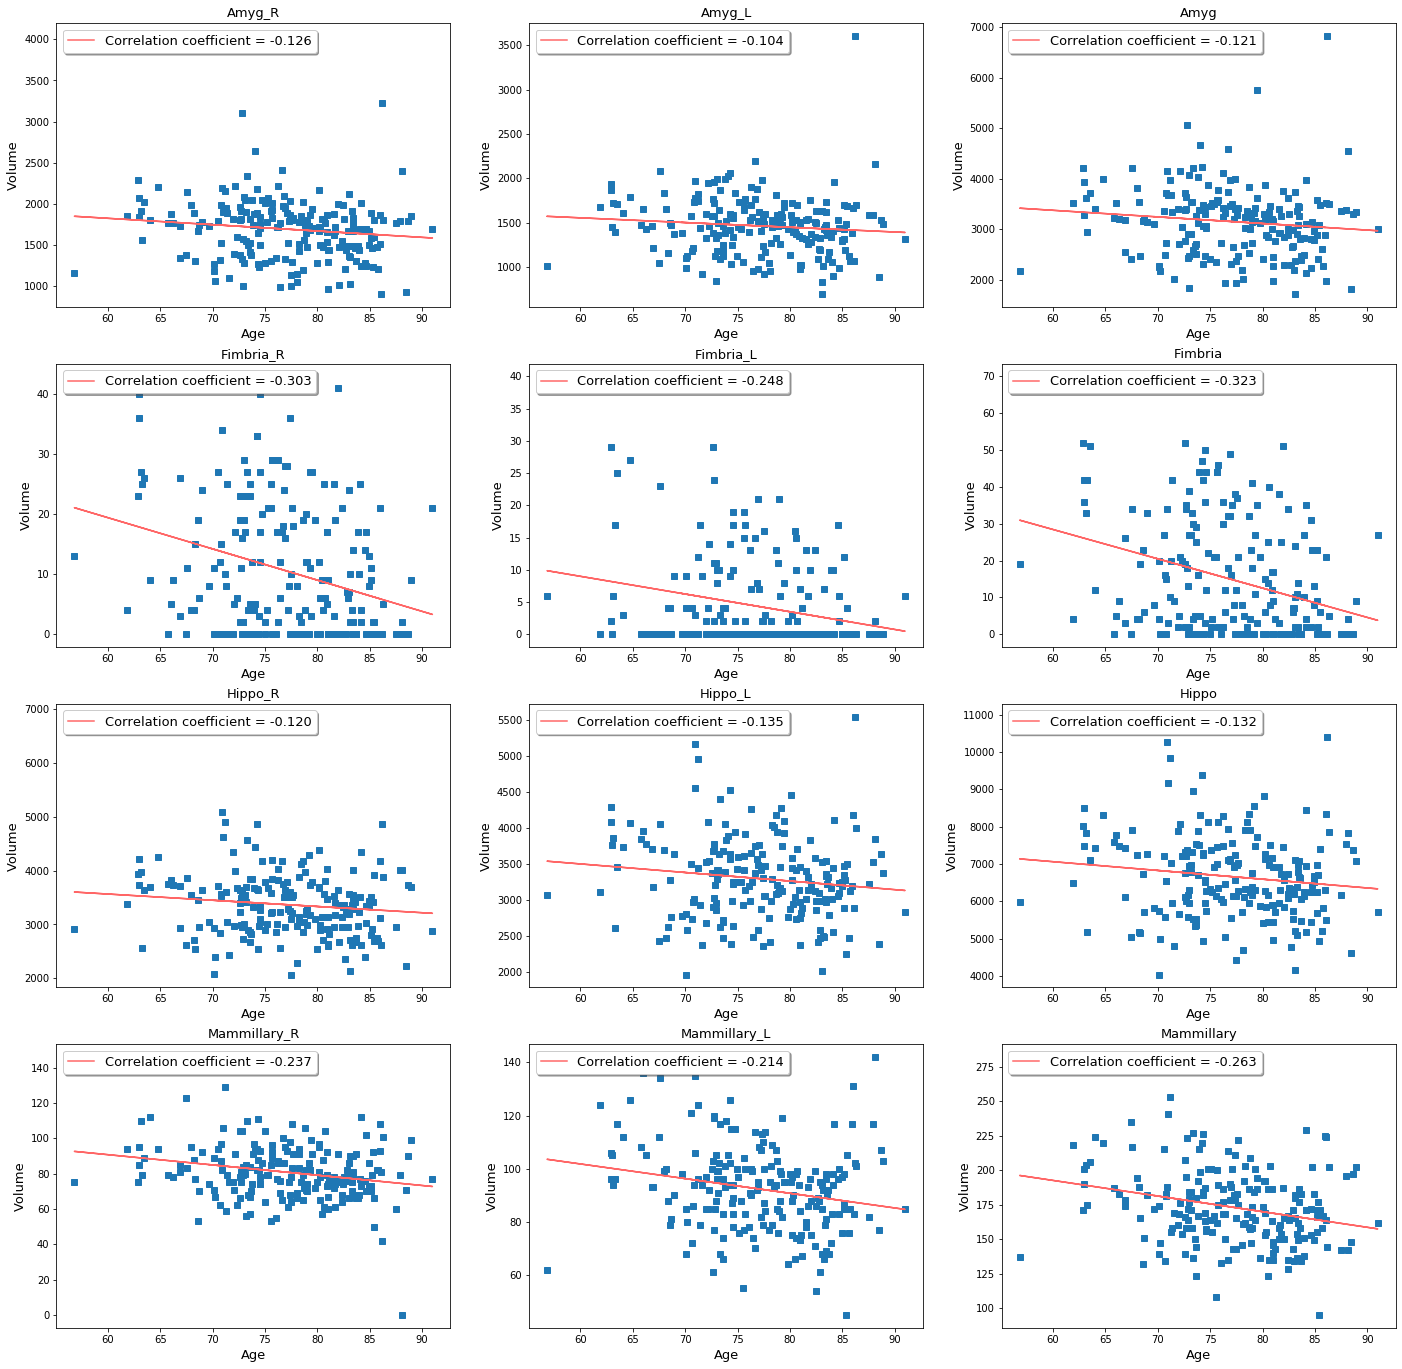

In [25]:
# Linear Regression
sets2=['Amyg_R','Amyg_L','Amyg','Fimbria_R','Fimbria_L','Fimbria',
'Hippo_R','Hippo_L','Hippo','Mammillary_R','Mammillary_L','Mammillary']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(24, 24))
coefficients=np.zeros(12)
for i in range(0,12):
    #print(sets[i])
    slope, intercept, r, p, stderr = scipy.stats.linregress(data_volume['Age'], data_volume[sets2[i]])
    line = f'Correlation coefficient = {r:.3f}'
    coefficients[i]=r
    axes[i//3,i%3].plot(data_volume['Age'], data_volume[sets2[i]], linewidth=0, marker='s')
    axes[i//3,i%3].plot(data_volume['Age'], intercept + slope * data_volume['Age'],label=line, color='#FF6666')
    axes[i//3,i%3].set_xlabel('Age', fontsize=13)
    axes[i//3,i%3].set_ylabel('Volume', fontsize=13)
    axes[i//3,i%3].set_title(sets2[i], fontsize=13)
    axes[i//3,i%3].legend(facecolor='white',loc='upper left', shadow= True, fontsize=13)

plt.show()

In [26]:
# Show Pearson's Coefficients to adjust linear relationship
for i in range(0,12):
    print("The Correlation coefficient of "+sets2[i] +' volume and Age = '+str(coefficients[i]))

The Correlation coefficient of Amyg_R volume and Age = -0.1255706588563713
The Correlation coefficient of Amyg_L volume and Age = -0.10448509489632063
The Correlation coefficient of Amyg volume and Age = -0.12145387394878772
The Correlation coefficient of Fimbria_R volume and Age = -0.30300877398065235
The Correlation coefficient of Fimbria_L volume and Age = -0.24750298449656583
The Correlation coefficient of Fimbria volume and Age = -0.32293418554360237
The Correlation coefficient of Hippo_R volume and Age = -0.11973953807997395
The Correlation coefficient of Hippo_L volume and Age = -0.13479399268903075
The Correlation coefficient of Hippo volume and Age = -0.13164324633110575
The Correlation coefficient of Mammillary_R volume and Age = -0.23658246329340357
The Correlation coefficient of Mammillary_L volume and Age = -0.2139426981803414
The Correlation coefficient of Mammillary volume and Age = -0.26270495751109074


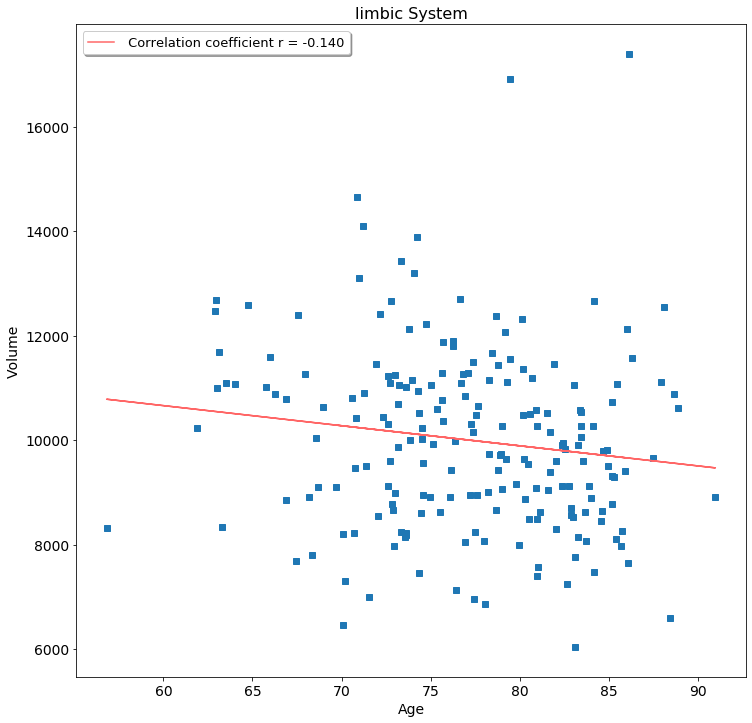

The Correlation coefficient of Whole volume of limbic system and Age = -0.14026164149675144


In [27]:
#print(Whole_value)

slope, intercept, r, p, stderr = scipy.stats.linregress(data_volume['Age'], Whole_value)
line = f' Correlation coefficient r = {r:.3f}'
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(data_volume['Age'], Whole_value, linewidth=0, marker='s')
ax.plot(data_volume['Age'], intercept + slope * data_volume['Age'],label=line, color='#FF6666')
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Volume', fontsize=14)
ax.set_title('limbic System', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(facecolor='white',loc='upper left', shadow= True, fontsize=13)

plt.show()
print("The Correlation coefficient of Whole volume of limbic system and Age = "+str(r))

In [28]:
#Calculate p-score
p_value_age=[]
for region in sets:
    (r2, p2)= scipy.stats.pearsonr(data_volume['Age'], data_volume[region])
    #print(r)
    p_value_age.append(p2) 

               p_values
Amyg_R         0.076440
Amyg_L         0.140909
Amyg           0.086676
Fimbria_R      0.000013
Fimbria_L      0.000410
Fimbria        0.000003
Hippo_R        0.091250
Hippo_L        0.057038
Hippo          0.063149
Mammillary_R   0.000744
Mammillary_L   0.002351
Mammillary     0.000171
Limbic_System  0.047595


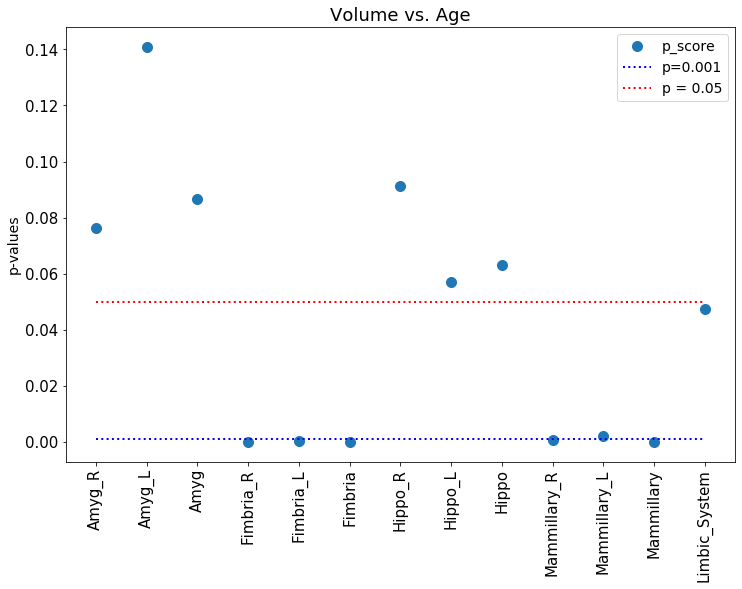

In [29]:
#plot P-values
p_values_age = pd.DataFrame({'p_values': p_value_age}, index=sets)   
plt.figure(figsize=(12,8))
plt.plot(p_values_age['p_values'],'.',markersize = 20)
plt.xticks(rotation='vertical',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('p-values', fontsize=14)
plt.plot(np.arange(p_values_age.shape[0]), np.full(p_values_age.shape[0],0.001), 'b:', linewidth=2)
plt.plot(np.arange(p_values_age.shape[0]), np.full(p_values_age.shape[0],0.05), 'r:', linewidth=2)
plt.legend(['p_score','p=0.001','p = 0.05'], loc='upper right', fontsize=14) 
plt.title('Volume vs. Age',fontsize = 18);
print(p_values_age)


In [31]:
# P-test
for i in range(len(p_values_age)):
    if p_values_age.p_values[i] <= 0.001:
        print('The volume of the '+sets[i]+' has significant difference in people of different ages in the dataset.')
    elif p_values_age.p_values[i] <= 0.05:
        print('The volume of the '+sets[i]+' has difference in people of different ages in the dataset.')
    else:
        print('There is no significant difference among the average volume of the '+sets[i]+' in people of different ages in the dataset.')

There is no significant difference among the average volume of the Amyg_R in people of different ages in the dataset.
There is no significant difference among the average volume of the Amyg_L in people of different ages in the dataset.
There is no significant difference among the average volume of the Amyg in people of different ages in the dataset.
The volume of the Fimbria_R has significant difference in people of different ages in the dataset.
The volume of the Fimbria_L has significant difference in people of different ages in the dataset.
The volume of the Fimbria has significant difference in people of different ages in the dataset.
There is no significant difference among the average volume of the Hippo_R in people of different ages in the dataset.
There is no significant difference among the average volume of the Hippo_L in people of different ages in the dataset.
There is no significant difference among the average volume of the Hippo in people of different ages in the dataset

#### Conclusion 2 : Mammillary and Fibria area has significant difference among people in different ages and volume and age are not simple linear relationship.  However, we can determine that age may lead decrease to the volume of limbic system.

###  The relationship between each region of the brain

In [92]:
def plotting(target_x):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
    rolls_combined = ['Amyg','Fimbria','Hippo','Mammillary']
    legend = ['Line of Best Fit', 'AD/MCI', 'NORMAL']
    targets = ['AD/MCI', 'NORMAL']
    colors = ['r', 'b']
    avg_r = 0
    ax_ind = 0
    for i in range(len(rolls_combined)):
        if rolls_combined[i] != target_x:
            df_temp = data_test[[rolls_combined[i], target_x, "Diagnosis"]]
            slope, intercept, r, p, stderr = scipy.stats.linregress(df_temp[target_x], df_temp[rolls_combined[i]])
            line = f'Correlation coefficient = {r:.3f}'
        
            print(r)
            avg_r += r
        
            ax[ax_ind].plot(df_temp[target_x], intercept + slope * df_temp[target_x],label=line, color='gray')
            for target, color in zip(targets,colors):
                indicesToKeep = df_temp['Diagnosis'] == target
                ax[ax_ind].scatter(df_temp.loc[indicesToKeep, target_x]
                   , df_temp.loc[indicesToKeep, rolls_combined[i]]
                   , c = color
                   , s = 50)
            ax[ax_ind].set_xlabel(target_x, fontsize=13)
            ax[ax_ind].set_ylabel("Volume", fontsize=13)
            ax[ax_ind].set_title(rolls_combined[i], fontsize=13)
            ax[ax_ind].legend(legend)
            ax[ax_ind].grid()
            ax_ind += 1

    return(avg_r/3)

In [93]:
data_test=dat_need.copy()
data_test["Amyg"] = data_test["Amyg_L"] + data_test["Amyg_R"]
data_test["Fimbria"] = data_test["Fimbria_L"] + data_test["Fimbria_R"]
data_test["Hippo"] = data_test["Hippo_L"] + data_test["Hippo_R"]
data_test["Mammillary"] = data_test["Mammillary_L"] + data_test["Mammillary_R"]


0.33259546085369834
0.7923904511711765
0.32521154964227167


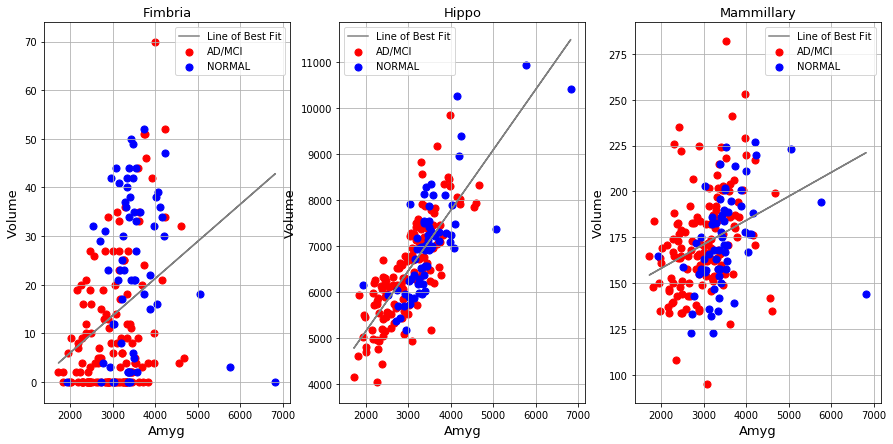

In [94]:
avg_r_values = []
Amyg_r = plotting("Amyg")
avg_r_values.append(Amyg_r)

0.33259546085369834
0.21848660432995823
0.09657040688867825


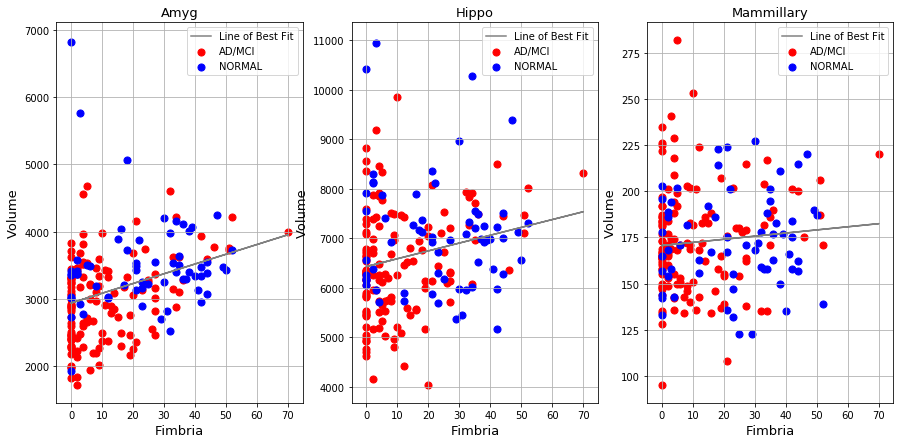

In [95]:
Fimbria_r = plotting("Fimbria")
avg_r_values.append(Fimbria_r)

0.7923904511711765
0.21848660432995823
0.4914654210603585


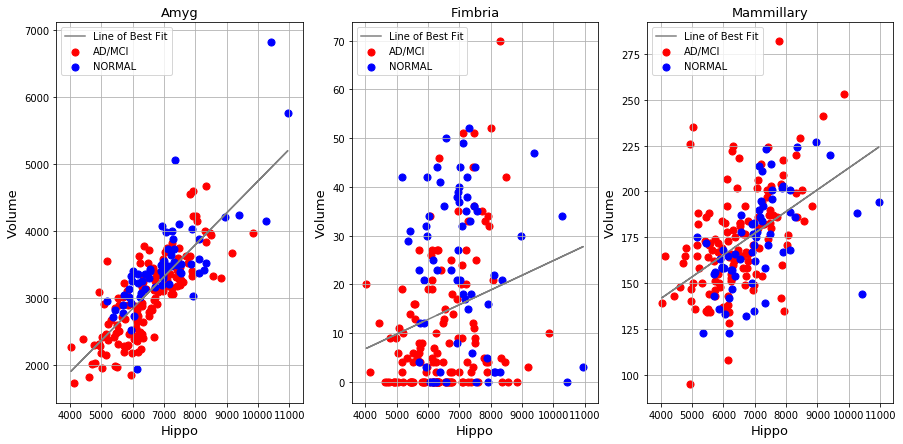

In [96]:
Hippo_r = plotting("Hippo")
avg_r_values.append(Hippo_r)

0.32521154964227167
0.09657040688867825
0.4914654210603585


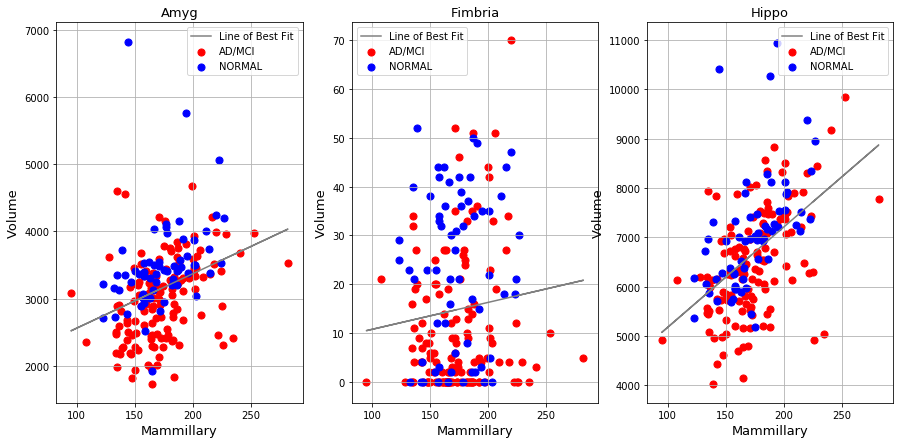

In [97]:
Mammillary_r = plotting("Mammillary")
avg_r_values.append(Mammillary_r)

In [98]:
print(avg_r_values)
print(max(avg_r_values))

[0.4833991538890488, 0.21588415735744493, 0.5007808255204976, 0.3044157925304361]
0.5007808255204976


#### Classification Method 

In [99]:
data=data_org.copy()
df = data[data.columns.difference(['Subject_ID'])]
df= df[df.columns.difference(['Gender'])]
df= df[df.columns.difference(['Diagnosis'])]
features = list(df.columns)
x = df.loc[:, features].values
y = data.loc[:,['Diagnosis']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, data[['Diagnosis']]], axis = 1)

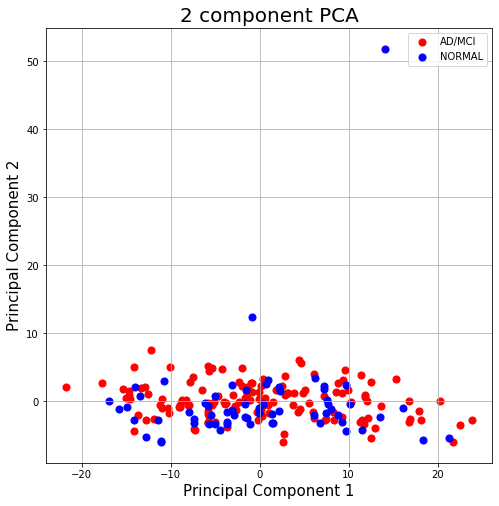

In [100]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['AD/MCI', 'NORMAL']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

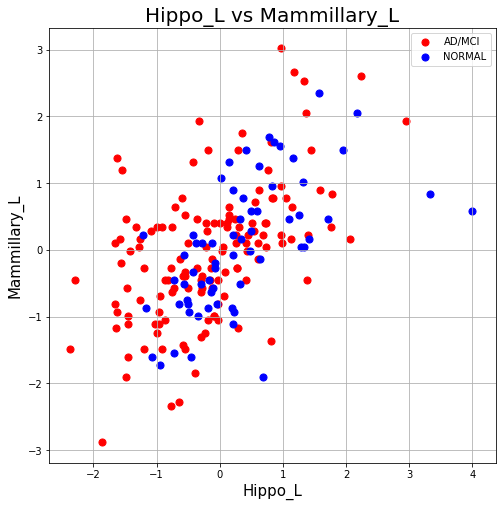

In [101]:
x = data.loc[:,['Hippo_L','Mammillary_L']].values
x = StandardScaler().fit_transform(x)

principalDf = pd.DataFrame(data = x
             , columns = ['Hippo_L','Mammillary_L'])

finalDf = pd.concat([principalDf, data[['Diagnosis']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Hippo_L', fontsize = 15)
ax.set_ylabel('Mammillary_L', fontsize = 15)
ax.set_title('Hippo_L vs Mammillary_L', fontsize = 20)
targets = ['AD/MCI', 'NORMAL']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Hippo_L']
               , finalDf.loc[indicesToKeep, 'Mammillary_L']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


#### Part 5: MRI Cloud 
 - Volume
 - Z-score
 - Barcode

In [40]:
output_file = open("MNI_286Labels_MNI_stats.txt", 'r')
lines = output_file.readlines()
relevant_lines = []
 
count = 0
for line in lines:
    splits = line.strip().split('\t')
    if len(splits) > 1:
        if 'Amyg' in splits[1] or 'Fimbria' in splits[1] or 'Hippo' in splits[1] or 'Mammillary' in splits[1]:
            relevant_lines.append(splits)

In [41]:
mri_org = pd.DataFrame(columns = rolls)
mri_org = mri_org.append({'Amyg_R': 0,'Fimbria_R': 0,'Hippo_R': 0,'Mammillary_R': 0,'Amyg_L': 0,'Fimbria_L': 0,'Hippo_L': 0,'Mammillary_L': 0}, ignore_index=True)

for i in range(len(relevant_lines)):
    for j in range(len(rolls)):
        if relevant_lines[i][1] == rolls[j]:
            mri_org[rolls[j]] = float(relevant_lines[i][2])
print(mri_org)

   Amyg_R  Fimbria_R  Hippo_R  Mammillary_R  Amyg_L  Fimbria_L  Hippo_L  \
0  1994.0       27.0   4537.0         121.0  1861.0       41.0   4682.0   

   Mammillary_L  
0         148.0  


   Amyg_R  Fimbria_R  Hippo_R  Mammillary_R  Amyg_L  Fimbria_L  Hippo_L  \
0  1994.0       27.0   4537.0         121.0  1861.0       41.0   4682.0   

   Mammillary_L    Amyg  Fimbria  Mammillary   Hippo  Limbic_System  
0         148.0  3855.0     68.0       269.0  9219.0        13411.0  


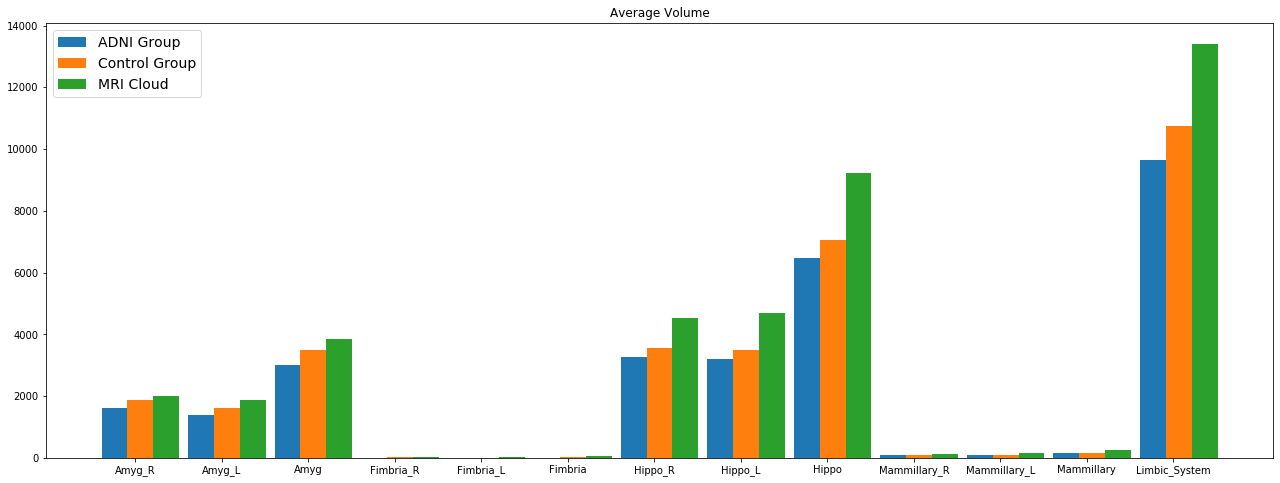

In [42]:
#Sum up the whole limbic system
mri=mri_org.copy()
Whole_value3=mri.Amyg_R+mri.Amyg_L+mri.Fimbria_R+mri.Fimbria_L+mri.Mammillary_R+mri.Mammillary_L+mri.Hippo_R+mri.Hippo_L
mri['Amyg']=mri.Amyg_R+mri.Amyg_L
mri['Fimbria']=mri.Fimbria_R+mri.Fimbria_L
mri['Mammillary']=mri.Mammillary_R+mri.Mammillary_L
mri['Hippo']=mri.Hippo_R+mri.Hippo_L
mri['Limbic_System']=Whole_value3

print(mri)
bar_width1=0.3
index_1=np.arange(len(sets))   
index_2=index_1+bar_width1 
index_3=index_2+bar_width1
#Plot
plt.figure(figsize=(22,8))
plt.title('Average Volume')
for i in range(13):
    plt.bar(index_1[i],height=ADNI_avg[sets[i]],color='#1f77b4',width=bar_width1)
    plt.bar(index_2[i],height=control_avg[sets[i]],color='#ff7f0e',width=bar_width1)
    plt.bar(index_3[i],height=mri[sets[i]],color='#2ca02c',width=bar_width1)
plt.xticks(index_1+0.8*bar_width1,sets)
plt.legend(['ADNI Group','Control Group','MRI Cloud'], loc='upper left', fontsize=14) 
plt.show()

In [43]:
#Calculate z-score of mri
mri_z=mri_org.copy()
mri_z_1=z_score(mri_z.Amyg_R,control.Amyg_R)
mri_z_2=z_score(mri_z.Fimbria_R,control.Fimbria_R)
mri_z_3=z_score(mri_z.Hippo_R,control.Hippo_R)
mri_z_4=z_score(mri_z.Mammillary_R,control.Mammillary_R)
mri_z_5=z_score(mri_z.Amyg_L,control.Amyg_L)
mri_z_6=z_score(mri_z.Fimbria_L,control.Fimbria_L)
mri_z_7=z_score(mri_z.Hippo_L,control.Hippo_L)
mri_z_8=z_score(mri_z.Mammillary_L,control.Mammillary_L)

mri_z.Amyg_R=mri_z_1
mri_z.Fimbria_R=mri_z_2
mri_z.Hippo_R=mri_z_3
mri_z.Mammillary_R=mri_z_4
mri_z.Amyg_L=mri_z_5
mri_z.Fimbria_L=mri_z_6
mri_z.Hippo_L=mri_z_7
mri_z.Mammillary_L=mri_z_8

print(mri_z)
#save
pf=pd.DataFrame(mri_z)
file_path=pd.ExcelWriter('Z_score_mri.xlsx')
pf.to_excel(file_path,encoding='utf-8',index=False)
file_path.save()

     Amyg_R  Fimbria_R   Hippo_R  Mammillary_R    Amyg_L  Fimbria_L  Hippo_L  \
0  0.267468   1.031039  1.415459      3.078043  0.751348    3.91246   2.2018   

   Mammillary_L  
0      3.441556  


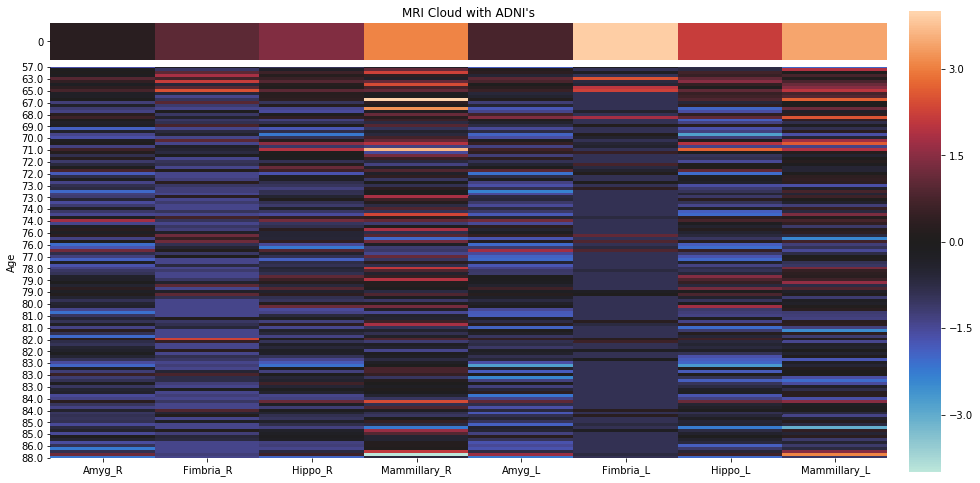

In [44]:
#Compared ADNI with MRI sorted by age
fig,axn=plt.subplots(10,1,figsize=(15,8))
cbar_new=fig.add_axes([0.92, 0.1, 0.03, 0.8])
plt.subplot(10,1,1)
sns.heatmap(mri_z, xticklabels=False, vmin=-4, vmax=4, center=0,cbar=False)
plt.yticks(rotation=0)
plt.title('MRI Cloud with ADNI\'s');

plt.subplot(10,1,(2,10))
sns.heatmap(ad_zscore_AGE, vmin=-4, vmax=4, center=0,cbar_ax=cbar_new)
plt.yticks(rotation=0);

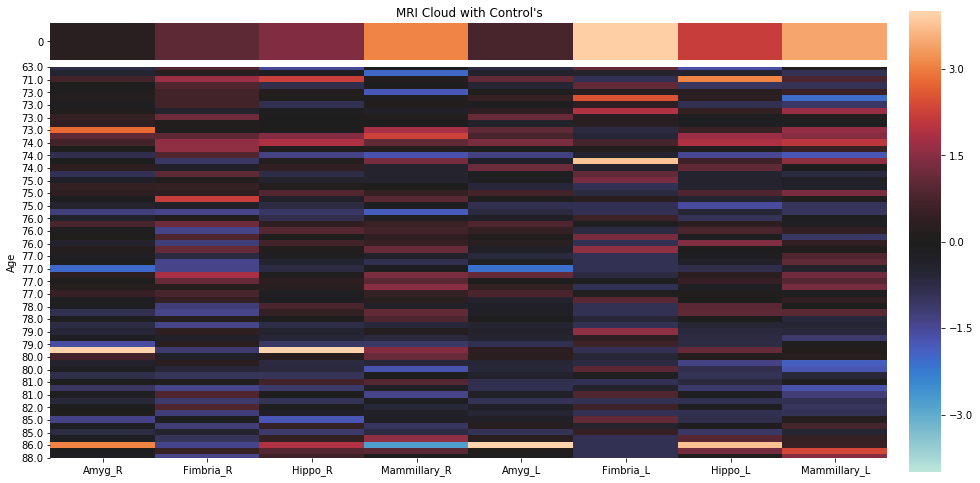

In [107]:
#Compared ANDI with Comntrol sorted by age
fig,axn=plt.subplots(10,1,figsize=(15,8))
cbar_new=fig.add_axes([0.92, 0.1, 0.03, 0.8])
plt.subplot(10,1,1)
sns.heatmap(mri_z, xticklabels=False, vmin=-4, vmax=4, center=0,cbar=False)
plt.yticks(rotation=0)
plt.title('MRI Cloud with Control\'s');

plt.subplot(10,1,(2,10))
sns.heatmap(control_zscore_AGE, vmin=-4, vmax=4, center=0,cbar_ax=cbar_new)
plt.yticks(rotation=0);